<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_scaled=train_input.reshape(-1,28,28,1)/255.0

train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [5]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 32개의 필터 사용, (3,3) 크기의 커널 사용

In [6]:
#(2,2)크기의 풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

In [7]:
# 두 번쨰 합성공 - 풀링 층 추가
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
# 밀집층에서 계산하기 위해 3차원 특성 맵을 일렬로 펼침.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

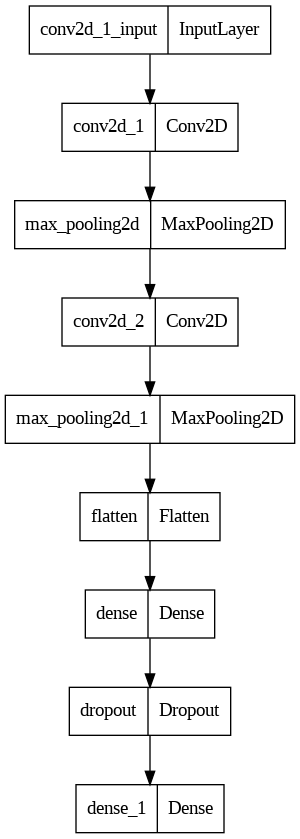

In [10]:
keras.utils.plot_model(model)

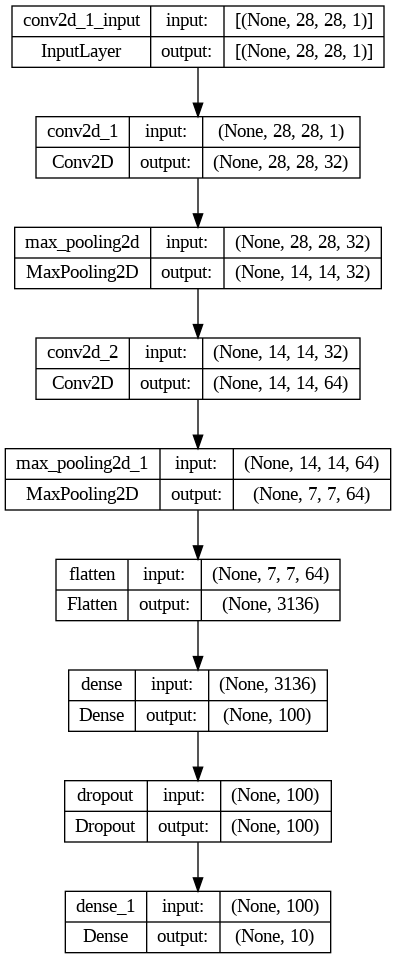

In [11]:
keras.utils.plot_model(model,show_shapes=True)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5210 - accuracy: 0.8142 - val_loss: 0.3323 - val_accuracy: 0.8760
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3438 - accuracy: 0.8766 - val_loss: 0.2758 - val_accuracy: 0.8979
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2972 - accuracy: 0.8932 - val_loss: 0.2500 - val_accuracy: 0.9081
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2622 - accuracy: 0.9040 - val_loss: 0.2409 - val_accuracy: 0.9105
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2406 - accuracy: 0.9127 - val_loss: 0.2242 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2210 - accuracy: 0.9190 - val_loss: 0.2210 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2049 - accuracy: 0.9247 - val_loss: 0.2263 - val_accuracy:

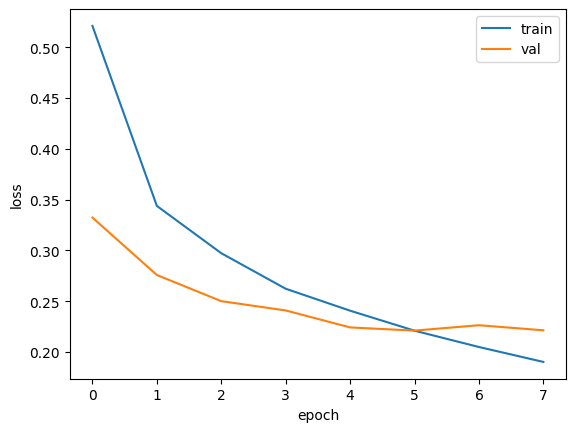

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2210 - accuracy: 0.9168


[0.22103089094161987, 0.9167500138282776]

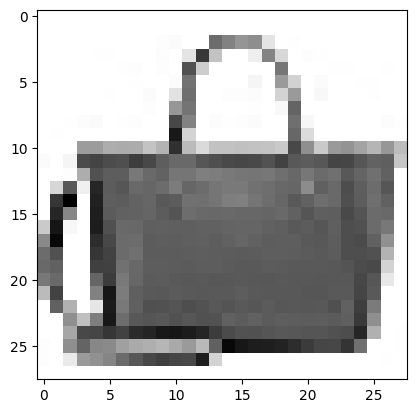

In [16]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [17]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 146ms/step
[[2.0411686e-14 1.0010672e-18 1.5210808e-17 2.0746512e-16 7.8900934e-17
  1.6184360e-12 3.1271943e-16 1.2549212e-13 1.0000000e+00 2.3914678e-13]]


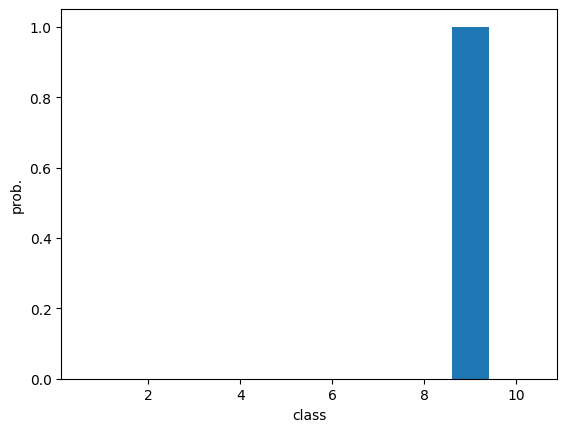

In [18]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [20]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [21]:
test_scaled=test_input.reshape(-1,28,28,1) /255.0

In [22]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2444 - accuracy: 0.9115


[0.2443913370370865, 0.9114999771118164]